In [1]:
#필요한 라이브러리 불러오기

import copy
#회귀분석 공분산
from statsmodels.stats.outliers_influence import variance_inflation_factor
#로지스틱회귀
from statsmodels.api import Logit
#평가함수
from sklearn.metrics import accuracy_score
#confusion matrix 모델 성능평가
from sklearn.metrics import confusion_matrix


from statsmodels.stats.proportion import proportions_ztest

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from statsmodels.api import qqplot, add_constant
from statsmodels.formula.api import ols

from scipy import stats
import seaborn as sns
import math
#데이터구성
import pandas as pd
#데이터시각화
import matplotlib.pyplot as plt
import matplotlib
import seaborn
#행렬연산
import numpy as np
#export_graphviz: 나무 구조 생성 및 저장
from sklearn.tree import export_graphviz
#나무 구조 시각화
import graphviz
#분류 Decision Tree
from sklearn.tree import DecisionTreeClassifier
#Decision Tree
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
#분류 random forest
from sklearn.ensemble import RandomForestClassifier
#random forest
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
#그래디언트부스팅(분류)
from sklearn.ensemble import GradientBoostingClassifier
#그래디언트부스팅
from sklearn.ensemble import GradientBoostingRegressor
#최적모델 파라미터 검색
from sklearn.model_selection import GridSearchCV


import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
#모델 성능 평가: F1 Score, ROC Curve, AUC
from sklearn.metrics import f1_score,roc_curve,auc


#스케일링
from sklearn.preprocessing import StandardScaler
#데이터분할
from sklearn.model_selection import train_test_split
#분류 서포트벡터머신
from sklearn.svm import SVC
#예측 서포트벡터머신
from sklearn.svm import SVR
#최적모델, 파라미터검색
from sklearn.model_selection import GridSearchCV


#분류 KNN
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df_card=pd.read_csv("/home/pirl/Desktop/health_data_당뇨.csv")
df_card.head()

,Unnamed: 0,Unnamed: 0.1,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,...,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,구강검진 수검여부,치석,BMI,당뇨예측
0,0,0,2016,5,2,6,11,160.0,50.0,67.0,...,1.0,0.7,13.0,7.0,20.0,1.0,0,-1.0,19.531250,0
1,1,1,2016,8,2,16,48,155.0,60.0,81.0,...,1.0,0.7,23.0,14.0,14.0,1.0,0,-1.0,24.973985,1
2,2,2,2016,29,2,9,11,155.0,60.0,83.0,...,1.0,0.8,21.0,20.0,55.0,1.0,0,-1.0,24.973985,0
3,3,3,2016,41,2,15,28,150.0,45.0,71.0,...,1.0,0.8,23.0,13.0,18.0,1.0,1,0.0,20.000000,0
4,4,4,2016,56,2,12,26,145.0,55.0,75.0,...,1.0,0.7,87.0,246.0,99.0,1.0,0,-1.0,26.159334,0


In [3]:
def GPT_ALT(data):
    ga = data['감마지티피']/data['(혈청지오티)ALT']
    return ga
df_card['GPT_ALT'] = df_card.apply(GPT_ALT, axis=1)

In [4]:
def AST_ALT(data):
    aa = data['(혈청지오티)AST']/data['(혈청지오티)ALT']
    return aa
df_card['AST_ALT'] = df_card.apply(AST_ALT, axis=1)

In [5]:
def scoring_data(data):
    score = '0'
    if data['(혈청지오티)ALT'] <= 40:
        score = '00'
    elif data['(혈청지오티)ALT'] > 40 and data['(혈청지오티)ALT'] <= 200:
        if data['BMI'] > 20:
            score = '10'
        else:
            score = '11'
    elif data['(혈청지오티)ALT'] > 200 and data['(혈청지오티)ALT'] <= 400:
        if data['성별코드'] == 1:
            if data['감마지티피'] > 180:
                score = '21'
            else:
                score = '20'
        else:
            if data['감마지티피'] > 110:
                score = '21'
            else:
                score = '20'
    elif data['(혈청지오티)ALT'] > 400 and data['(혈청지오티)ALT'] <= 1000:
        score = '30'
    else:
        score = '31'
    if data['GPT_ALT'] > 2:
        if data['AST_ALT'] > 1.5:
            if data['(혈청지오티)AST'] > 160:
                score = '22'
    return score
df_card['간손상지수'] = df_card.apply(scoring_data, axis=1)
df_card['간손상지수(이분)'] = np.where(df_card['간손상지수'] == '00', 0, 1)
df_card['간손상지수'].value_counts()
df_card['간손상지수(이분)'].value_counts()

0    61476
1     8521
Name: 간손상지수(이분), dtype: int64

In [6]:
def scoring_data(data):
    score = 0
    if data['수축기혈압'] >= 139:
        score=2
    elif data['수축기혈압'] < 139 and data['수축기혈압'] >=120:
        if data['이완기혈압'] >= 89:
            score=2
        elif data['이완기혈압'] < 89 and data['이완기혈압']>=80:
            score=1
        else:
            score=1
    else:
        if data['이완기혈압'] >= 89:
            score=2
        elif data['이완기혈압'] < 89 and data['이완기혈압']>=80:
            score=1
        else:
            score=0
    return score

df_card['심혈관질환지수'] = df_card.apply(scoring_data, axis=1)

In [7]:
df_card.head()

,Unnamed: 0,Unnamed: 0.1,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,...,흡연상태,구강검진 수검여부,치석,BMI,당뇨예측,GPT_ALT,AST_ALT,간손상지수,간손상지수(이분),심혈관질환지수
0,0,0,2016,5,2,6,11,160.0,50.0,67.0,...,1.0,0,-1.0,19.531250,0,2.857143,1.857143,00,0,1
1,1,1,2016,8,2,16,48,155.0,60.0,81.0,...,1.0,0,-1.0,24.973985,1,1.000000,1.642857,00,0,1
2,2,2,2016,29,2,9,11,155.0,60.0,83.0,...,1.0,0,-1.0,24.973985,0,2.750000,1.050000,00,0,0
3,3,3,2016,41,2,15,28,150.0,45.0,71.0,...,1.0,1,0.0,20.000000,0,1.384615,1.769231,00,0,1
4,4,4,2016,56,2,12,26,145.0,55.0,75.0,...,1.0,0,-1.0,26.159334,0,0.402439,0.353659,20,1,0


In [8]:
df_card.drop("Unnamed: 0",inplace=True,axis=1)
df_card.drop("Unnamed: 0.1",inplace=True,axis=1)
df_card.drop("기준년도",inplace=True,axis=1)
#df_card.drop("가입자일련번호",inplace=True,axis=1)
df_card.drop("GPT_ALT",inplace=True,axis=1)
df_card.drop("AST_ALT",inplace=True,axis=1)
df_card.drop("간손상지수",inplace=True,axis=1)


In [9]:
df_card.head()

,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),청력(좌),...,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,구강검진 수검여부,치석,BMI,당뇨예측,간손상지수(이분),심혈관질환지수
0,5,2,6,11,160.0,50.0,67.0,0.4,0.5,1.0,...,13.0,7.0,20.0,1.0,0,-1.0,19.531250,0,0,1
1,8,2,16,48,155.0,60.0,81.0,0.7,0.5,1.0,...,23.0,14.0,14.0,1.0,0,-1.0,24.973985,1,0,1
2,29,2,9,11,155.0,60.0,83.0,1.0,1.0,1.0,...,21.0,20.0,55.0,1.0,0,-1.0,24.973985,0,0,0
3,41,2,15,28,150.0,45.0,71.0,0.8,0.5,1.0,...,23.0,13.0,18.0,1.0,1,0.0,20.000000,0,0,1
4,56,2,12,26,145.0,55.0,75.0,1.2,1.2,1.0,...,87.0,246.0,99.0,1.0,0,-1.0,26.159334,0,1,0


In [10]:
df_card["심혈관질환지수"][df_card["심혈관질환지수"]==1]=0
df_card["심혈관질환지수"][df_card["심혈관질환지수"]==2]=1
df_card.head()

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),청력(좌),...,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,구강검진 수검여부,치석,BMI,당뇨예측,간손상지수(이분),심혈관질환지수
0,5,2,6,11,160.0,50.0,67.0,0.4,0.5,1.0,...,13.0,7.0,20.0,1.0,0,-1.0,19.531250,0,0,0
1,8,2,16,48,155.0,60.0,81.0,0.7,0.5,1.0,...,23.0,14.0,14.0,1.0,0,-1.0,24.973985,1,0,0
2,29,2,9,11,155.0,60.0,83.0,1.0,1.0,1.0,...,21.0,20.0,55.0,1.0,0,-1.0,24.973985,0,0,0
3,41,2,15,28,150.0,45.0,71.0,0.8,0.5,1.0,...,23.0,13.0,18.0,1.0,1,0.0,20.000000,0,0,0
4,56,2,12,26,145.0,55.0,75.0,1.2,1.2,1.0,...,87.0,246.0,99.0,1.0,0,-1.0,26.159334,0,1,0


In [11]:
def scoring_data(data):
  score = ""
  
  
  if data['당뇨예측'] == 1:
    if data['간손상지수(이분)']==1:
      if data['심혈관질환지수']==1:
        score='7'
      else:
        score='4'
    else:
      if data['심혈관질환지수']==1:
        score='6'
      else:
        score='2'
  else:
    if data['간손상지수(이분)']==1:
      if data['심혈관질환지수']==1:
        score='5'
      else:
        score='1'
    else:
      if data['심혈관질환지수']==1:
        score='3'
      else:
        score='0'
      
      
      
  return score

df_card['주요질병합병코드'] = df_card.apply(scoring_data, axis=1)

In [12]:
df_card.head()

,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),청력(좌),...,(혈청지오티)ALT,감마지티피,흡연상태,구강검진 수검여부,치석,BMI,당뇨예측,간손상지수(이분),심혈관질환지수,주요질병합병코드
0,5,2,6,11,160.0,50.0,67.0,0.4,0.5,1.0,...,7.0,20.0,1.0,0,-1.0,19.531250,0,0,0,0
1,8,2,16,48,155.0,60.0,81.0,0.7,0.5,1.0,...,14.0,14.0,1.0,0,-1.0,24.973985,1,0,0,2
2,29,2,9,11,155.0,60.0,83.0,1.0,1.0,1.0,...,20.0,55.0,1.0,0,-1.0,24.973985,0,0,0,0
3,41,2,15,28,150.0,45.0,71.0,0.8,0.5,1.0,...,13.0,18.0,1.0,1,0.0,20.000000,0,0,0,0
4,56,2,12,26,145.0,55.0,75.0,1.2,1.2,1.0,...,246.0,99.0,1.0,0,-1.0,26.159334,0,1,0,1


In [13]:
df_card_cla=copy.copy(df_card)
df_card_cla.drop("당뇨예측",inplace=True,axis=1)
df_card_cla.drop("간손상지수(이분)",inplace=True,axis=1)
df_card_cla.drop("수축기혈압",inplace=True,axis=1)
df_card_cla.drop("이완기혈압",inplace=True,axis=1)
df_card_cla.drop("(혈청지오티)ALT",inplace=True,axis=1)
df_card_cla.drop("식전혈당(공복혈당)",inplace=True,axis=1)
df_card_cla.drop("심혈관질환지수",inplace=True,axis=1)
df_card_cla.head()

,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),청력(좌),...,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,감마지티피,흡연상태,구강검진 수검여부,치석,BMI,주요질병합병코드
0,5,2,6,11,160.0,50.0,67.0,0.4,0.5,1.0,...,12.8,1.0,0.7,13.0,20.0,1.0,0,-1.0,19.531250,0
1,8,2,16,48,155.0,60.0,81.0,0.7,0.5,1.0,...,13.0,1.0,0.7,23.0,14.0,1.0,0,-1.0,24.973985,2
2,29,2,9,11,155.0,60.0,83.0,1.0,1.0,1.0,...,12.7,1.0,0.8,21.0,55.0,1.0,0,-1.0,24.973985,0
3,41,2,15,28,150.0,45.0,71.0,0.8,0.5,1.0,...,13.0,1.0,0.8,23.0,18.0,1.0,1,0.0,20.000000,0
4,56,2,12,26,145.0,55.0,75.0,1.2,1.2,1.0,...,13.9,1.0,0.7,87.0,99.0,1.0,0,-1.0,26.159334,1


In [14]:
df_raw_x=df_card_cla.drop('주요질병합병코드',axis=1)
df_raw_y=df_card_cla['주요질병합병코드']


df_train_x, df_test_x = train_test_split(df_raw_x,test_size=0.3,random_state=1234)
df_train_y , df_test_y = train_test_split(df_raw_y,test_size=0.3,random_state=1234)



print("train data size:{}".format(df_train_x.shape))
print("test data size:{}".format(df_test_x.shape))
print("train data size:{}".format(df_train_y.shape))
print("test data size:{}".format(df_test_y.shape))

train data size:(48997, 24)
test data size:(21000, 24)
train data size:(48997,)
test data size:(21000,)


In [15]:
#기본모델 생성

tree_uncustomized = DecisionTreeClassifier(random_state=1234)
tree_uncustomized.fit(df_train_x, df_train_y)

print("Accuracy on training set: {:.3f}".format(tree_uncustomized.score(df_train_x,df_train_y)))
print("Accuracy on test set:{:.3f}".format(tree_uncustomized.score(df_test_x,df_test_y)))

Accuracy on training set: 1.000
Accuracy on test set:0.442


In [16]:
df_can=pd.read_csv("/home/pirl/Desktop/cell_image_finish.csv")
df_can.head()

,Image ID,Diagnosis,Mean Radius,Mean Perimeter,Mean Area,Mean Texture,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points,...,SE Texture,SE Smoothness,SE Compactness,SE Concavity,SE Concave Points,SE Symmetry,SE Fractal Dim,user_ID,Inspection equipment,Hosp
0,84358402,M,20.29,135.10,1297.0,14.34,0.10,0.1328,0.19800,0.1043,...,0.7813,0.0115,0.0246,0.0569,0.0189,0.0176,0.0051,1589,DSA-1,BDS_flu
1,843786,M,12.45,82.57,477.1,15.70,0.13,0.1700,0.15780,0.0809,...,0.8902,0.0075,0.0335,0.0367,0.0114,0.0217,0.0051,2406,DSA-2,BDS_flu
2,84458202,M,13.71,90.20,577.9,20.83,0.12,0.1645,0.09366,0.0599,...,1.3770,0.0088,0.0303,0.0249,0.0145,0.0149,0.0054,6991,DSA-3,BDS_flu
3,84501001,M,12.46,83.97,475.9,24.04,0.12,0.2396,0.22730,0.0854,...,1.5990,0.0071,0.0722,0.0774,0.0143,0.0179,0.0101,20622,DSA-4,BDS_flu
4,84799002,M,14.54,96.73,658.8,27.54,0.11,0.1595,0.16390,0.0736,...,1.0330,0.0056,0.0424,0.0474,0.0109,0.0186,0.0055,24488,F-1,BDS_flu


In [17]:
df_card_cla["가입자일련번호"]=df_card["가입자일련번호"]

df_temp1=pd.DataFrame()
df_temp1["암진단결과"]=df_can["Diagnosis"]
df_temp1["가입자일련번호"]=df_can["user_ID"]

result=pd.merge(df_temp1,df_card_cla,on=["가입자일련번호"],how='left')

In [18]:
result.head()

,암진단결과,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,감마지티피,흡연상태,구강검진 수검여부,치석,BMI,주요질병합병코드
0,M,1589,1,11,11,180.0,105.0,110.0,0.7,0.8,...,15.6,1.0,0.6,35.0,85.0,2.0,1,0.0,32.407407,7
1,M,2406,1,10,26,180.0,70.0,92.0,0.9,0.9,...,14.4,1.0,0.9,878.0,339.0,3.0,0,-1.0,21.604938,7
2,M,6991,1,11,43,165.0,75.0,93.0,0.4,0.6,...,15.3,1.0,0.7,34.0,95.0,3.0,0,-1.0,27.548209,7
3,M,20622,1,8,26,180.0,125.0,121.0,1.5,1.5,...,16.5,2.0,0.9,114.0,161.0,3.0,0,-1.0,38.580247,7
4,M,24488,1,9,26,160.0,80.0,91.0,0.9,1.0,...,17.1,4.0,0.8,28.0,119.0,2.0,0,-1.0,31.250000,6


In [19]:
#"암진단결과~주요질병합병코드+성별코드+연령대코드(5세단위)+신장(5Cm단위)+체중(5Kg단위)+허리둘레"

In [20]:
df_raw_x=pd.DataFrame()
df_raw_x['주요질병합병코드']=result['주요질병합병코드']
df_raw_x['성별코드']=result['성별코드']
df_raw_x['연령대코드(5세단위)']=result['연령대코드(5세단위)']
df_raw_x['신장(5Cm단위)']=result['신장(5Cm단위)']
df_raw_x['체중(5Kg단위)']=result['체중(5Kg단위)']
df_raw_x['허리둘레']=result['허리둘레']
df_raw_y=result['암진단결과']


df_train_x, df_test_x = train_test_split(df_raw_x,test_size=0.3,random_state=1234)
df_train_y , df_test_y = train_test_split(df_raw_y,test_size=0.3,random_state=1234)



print("train data size:{}".format(df_train_x.shape))
print("test data size:{}".format(df_test_x.shape))
print("train data size:{}".format(df_train_y.shape))
print("test data size:{}".format(df_test_y.shape))

train data size:(172, 6)
test data size:(75, 6)
train data size:(172,)
test data size:(75,)


In [21]:
df_raw_x.head()

,주요질병합병코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg단위),허리둘레
0,7,1,11,180.0,105.0,110.0
1,7,1,10,180.0,70.0,92.0
2,7,1,11,165.0,75.0,93.0
3,7,1,8,180.0,125.0,121.0
4,6,1,9,160.0,80.0,91.0


In [23]:
df_raw_y.head()

0    M
1    M
2    M
3    M
4    M
Name: 암진단결과, dtype: object

In [25]:
df_raw_y = df_raw_y.replace("B",0).replace("M",1)
df_raw_y.head()

0    1
1    1
2    1
3    1
4    1
Name: 암진단결과, dtype: int64

## 모델링

In [26]:
import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [27]:
import matplotlib as mpl
import matplotlib.font_manager as fm
font_location = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname = font_location).get_name()
mpl.rc('font',family= 'Malgun Gothic')
import warnings
warnings.filterwarnings('ignore')

### (1) decision tree

In [28]:
#데이터 분할 (train:test = 7:3)
df_train_x,df_test_x,df_train_y,df_test_y = train_test_split(df_raw_x,df_raw_y,
                                                            test_size=0.3)

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (172, 6)
train data Y size : (172,)
test data X size : (75, 6)
test data Y size : (75,)


In [29]:
#모델 parameter 조정
#train/ test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(max_depth = v_max_depth, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['Depth'] = para_depth
df_accuracy_depth['TrainAccuracy'] = train_accuracy
df_accuracy_depth['TestAccuracy'] = test_accuracy

In [30]:
#모델 parameter 조정 : max_depth : 최대 깊이 변경에 따른 모델 성능
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.919,0.893
1,2,0.953,0.920
2,3,0.959,0.920
3,4,0.977,0.853
4,5,0.983,0.827
5,6,0.994,0.827
6,7,0.994,0.827
7,8,1.000,0.787
8,9,1.000,0.787
9,10,1.000,0.787


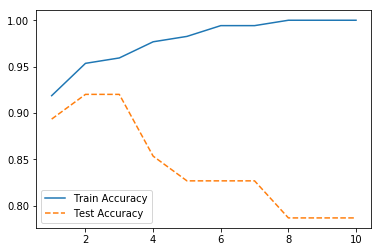

In [31]:
plt.plot(para_depth, train_accuracy, linestyle='-', label = 'Train Accuracy')
plt.plot(para_depth, test_accuracy, linestyle='--', label = 'Test Accuracy')
plt.legend()

최대 깊이 증가에 따라 모델의 정확도는 증가하며 train/test 데이터의 성능 변화를 고려하여 3을 선택한다.

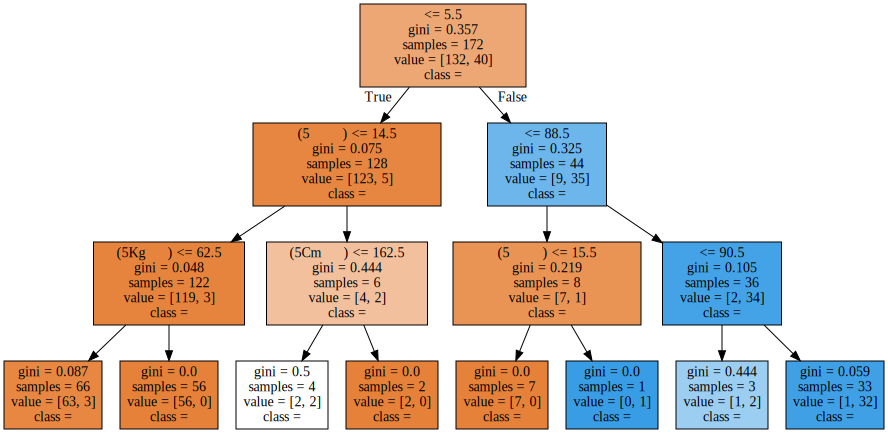

In [33]:
v_feature_name = df_train_x.columns

#길이가 3인 모델
tree_depth = DecisionTreeClassifier(max_depth = 3, random_state=1234)
tree_depth.fit(df_train_x, df_train_y)

export_graphviz(tree_depth, out_file='tree_depth.dot', class_names=['양성','악성'],
               feature_names=v_feature_name, impurity=True, filled=True)

with open('tree_depth.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [34]:
#min_samples_split : 분리 노드의 최소 자료 수 변경에 따른 모델 성능

train_accuracy = []; test_accuracy = []
para_split=[n_split * 10 for n_split in range(1,11)]
for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(min_samples_split = v_min_samples_split, max_depth = 3,
                                 random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x,df_test_y))
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split['MinSamplesSplit'] = para_split
df_accuracy_split['TrainAccuracy'] = train_accuracy
df_accuracy_split['TestAccuracy'] = test_accuracy

In [35]:
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,10,0.953,0.920
1,20,0.953,0.920
2,30,0.953,0.920
3,40,0.953,0.920
4,50,0.919,0.893
5,60,0.919,0.893
6,70,0.919,0.893
7,80,0.919,0.893
8,90,0.919,0.893
9,100,0.919,0.893


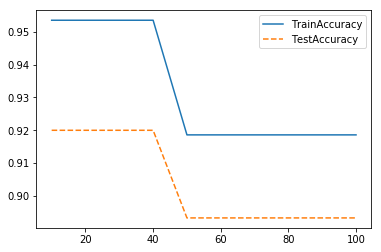

In [36]:
plt.plot(para_split, train_accuracy, linestyle='-', label='TrainAccuracy')
plt.plot(para_split, test_accuracy, linestyle='--', label='TestAccuracy')
plt.legend()

분리 노드의 최소 자료 수 증가에 따라 모델의 정확도는 감소하며 train/test 데이터의 성능 변화를 고려하여 20을 선택한다.

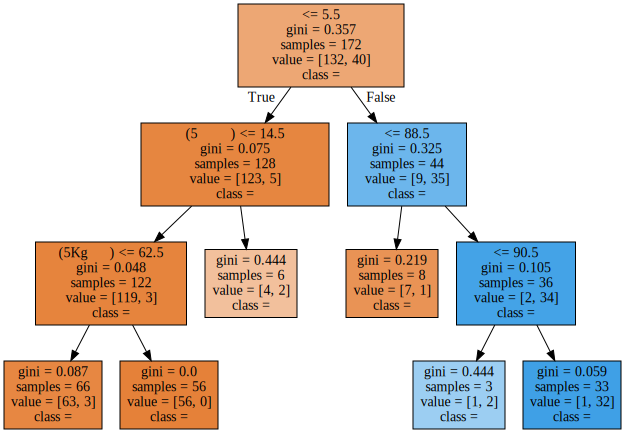

In [39]:
#min_samples_split: 분리 노드의 최소 자료 수 변경에 따른 모델 성능

#분리노드의 최소 자료 수가 20인 모델
tree_depth = DecisionTreeClassifier(max_depth = 3, min_samples_split = 20, random_state=1234)
tree_depth.fit(df_train_x, df_train_y)

export_graphviz(tree_depth, out_file='tree_depth.dot', class_names=['양성','악성'],
               feature_names = v_feature_name, impurity =True, filled=True)

with open('tree_depth.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [40]:
#min_samples_leaf : 잎사귀 노드의 최소 자료 수 변경에 따른 모델 성능

train_accuracy = []; test_accuracy = []
para_leaf=[n_leaf * 2 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(min_samples_leaf = v_min_samples_leaf, min_samples_split=20,
                                  max_depth = 3,random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x,df_test_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf['MinSamplesLeaf'] = para_leaf
df_accuracy_leaf['TrainAccuracy'] = train_accuracy
df_accuracy_leaf['TestAccuracy'] = test_accuracy

In [41]:
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,2,0.953,0.920
1,4,0.953,0.920
2,6,0.953,0.920
3,8,0.953,0.920
4,10,0.948,0.880
5,12,0.930,0.853
6,14,0.930,0.853
7,16,0.919,0.893
8,18,0.919,0.893
9,20,0.919,0.893


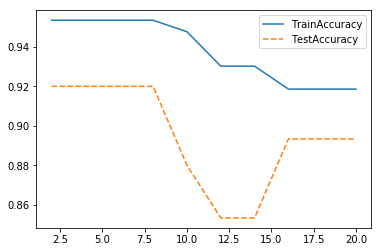

In [42]:
plt.plot(para_leaf, train_accuracy, linestyle='-', label='TrainAccuracy')
plt.plot(para_leaf, test_accuracy, linestyle='--', label='TestAccuracy')
plt.legend()

잎사귀 노드 최소 자료 수 증가에 따라 모델의 정확도는 감소하며 train/test 데이터의 성능 변화를고려하여 8을 선택한다.

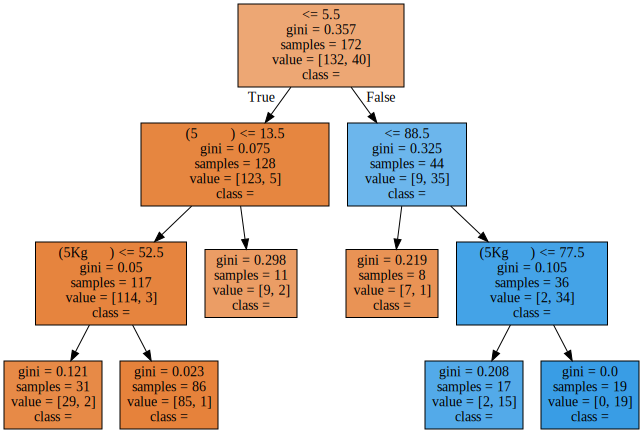

In [43]:
#잎사귀의 최소 자료 수가 8인 모델
tree_low = DecisionTreeClassifier(max_depth = 3, min_samples_split=20, min_samples_leaf=8,
                                 random_state=1234)
tree_low.fit(df_train_x, df_train_y)

export_graphviz(tree_low, out_file='tree_low.dot', class_names=['양성','악성'],
               feature_names = v_feature_name, impurity=True, filled=True)

with open('tree_low.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [44]:
tree_final = DecisionTreeClassifier(max_depth = 3, min_samples_split=20, min_samples_leaf=8,
                                   random_state=1234)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=8, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1234,
            splitter='best')

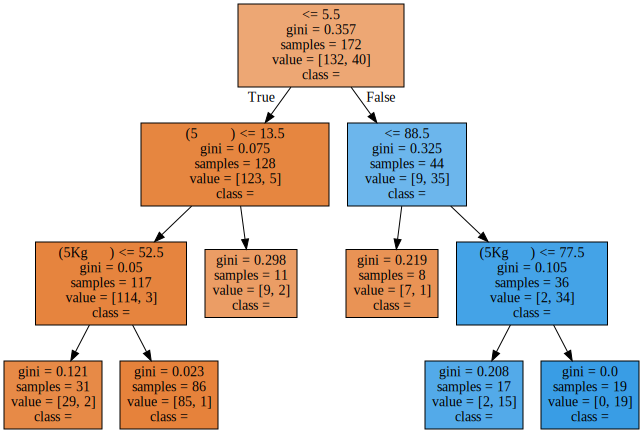

In [45]:
export_graphviz(tree_final, out_file='tree_final.dot', class_names=['양성','악성'],
               feature_names = v_feature_name, impurity = True, filled =True)
with open('tree_final.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [46]:
#최종 모델 평가

y_pred = tree_final.predict(df_test_x)
print("Accuracy:{0:.3f}\n".format(tree_final.score(df_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y,y_pred)))

Accuracy:0.920

Confusion matrix: 
[[48  3]
 [ 3 21]]


In [47]:
#결론도출
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = tree_final.feature_importances_

df_importance.sort_values('Importance', ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
0,주요질병합병코드,0.795
5,허리둘레,0.187
2,연령대코드(5세단위),0.010
4,체중(5Kg단위),0.008
1,성별코드,0.000
3,신장(5Cm단위),0.000


In [49]:
#한글사용

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_manager.get_fontconfig_fonts()

fontname = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontname = font_manager.FontProperties(fname=fontname).get_name()
plt.style.use('seaborn-white')
rc('font', family=fontname)

Text(0, 0.5, '설명변수')

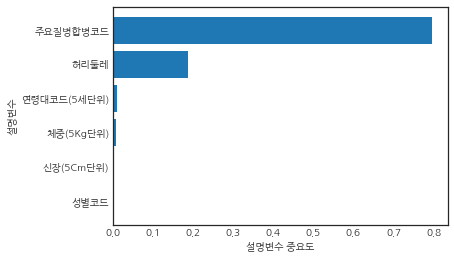

In [50]:
df_importance.sort_values('Importance', ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('설명변수 중요도')
plt.ylabel('설명변수')

### 결과해석
1. (당뇨, 고혈압) 또는 (당뇨, 간질환, 고혈압) 을 앓고 있다면 암 발생확률이 3배 이상 증가한다.
2. 위의 경우와 동시에 허리둘레가 88.5 이상으로 복부비만도 함께 갖고 있다면 암 발생확률은 20% 더 증가한다.

### (2) random forest

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
#모델 parameter 조정 : n_estimators : 트리 수 변경에 따른 모델 성능
train_accuracy = []; test_accuracy = []

para_n_tree = [n_tree * 10 for n_tree in range(1,16)]

for v_n_estimators in para_n_tree:
    rf=RandomForestClassifier(n_estimators=v_n_estimators, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

df_accuracy_n = pd.DataFrame()
df_accuracy_n['n_estimators'] = para_n_tree
df_accuracy_n['TrainAccuracy'] = train_accuracy
df_accuracy_n['TestAccuracy'] = test_accuracy

In [54]:
df_accuracy_n.round(3)

,n_estimators,TrainAccuracy,TestAccuracy
0,10,0.994,0.867
1,20,0.988,0.893
2,30,0.994,0.880
3,40,0.994,0.880
4,50,0.994,0.880
5,60,0.994,0.880
6,70,1.000,0.880
7,80,1.000,0.880
8,90,1.000,0.893
9,100,1.000,0.880


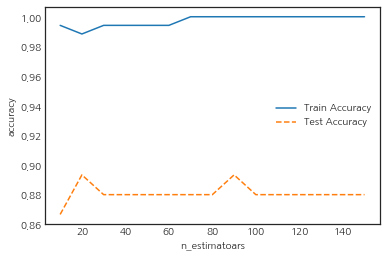

In [55]:
plt.plot(para_n_tree, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_n_tree, test_accuracy, linestyle='--', label='Test Accuracy')
plt.xlabel('n_estimatoars'); plt.ylabel('accuracy')
plt.legend()

생성하는 결정 트리 수 증가에 따라 모델의 정확도는 증가하며 train/test 데이터의 성능 변화를 고려하여 20을 선택한다. OOB를 이용한 적정 나무 확인이 가능하다.

In [56]:
#n_estimators : 트리수 변경에 따른 OOB error 변화
oob_error = []

for v_n_estimator in range(1,151):
    rf=RandomForestClassifier(n_estimators=v_n_estimator, oob_score=True, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    oob_error.append(1 - rf.oob_score_)

Text(0.5, 0, 'n_estimators')

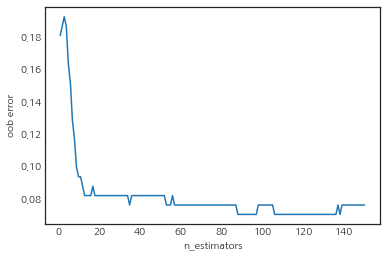

In [57]:
plt.plot(range(1,151), oob_error)
plt.ylabel('oob error')
plt.xlabel('n_estimators')

In [58]:
#max_depth : 최대 깊이 변경에 따른 모델 성능
train_accuracy = []; test_accuracy = []

para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    rf=RandomForestClassifier(max_depth = v_max_depth, n_estimators = 20, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['Depth'] = para_depth
df_accuracy_depth['TrainAccuracy'] = train_accuracy
df_accuracy_depth['TestAccuracy'] = test_accuracy

In [59]:
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.936,0.853
1,2,0.959,0.920
2,3,0.959,0.920
3,4,0.971,0.907
4,5,0.977,0.907
5,6,0.983,0.893
6,7,0.988,0.893
7,8,0.988,0.880
8,9,0.988,0.893
9,10,0.988,0.893


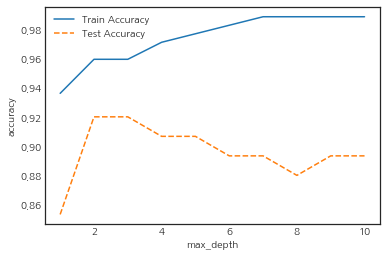

In [60]:
plt.plot(para_depth, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_depth, test_accuracy, linestyle='--', label='Test Accuracy')
plt.xlabel('max_depth'); plt.ylabel('accuracy')
plt.legend()

최대 깊이 증가에 따라 모델의 정확도는 증가하며 train/test데이터의 성능 변화를 고려하여 3를 선택한다.

In [66]:
#min_samples_split : 분리 노드의 최소 자료 수 변경에 따른 모델 성능
train_accuracy =[]; test_accuracy = []

para_split = [n_split * 10 for n_split in range(1,11)]

for v_min_samples_split in para_split :
    rf=RandomForestClassifier(min_samples_split = v_min_samples_split, max_depth=3,
                             n_estimators=20, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split['MinSamplesSplit'] = para_split
df_accuracy_split['TrainAccuracy'] = train_accuracy
df_accuracy_split['TestAccuracy'] = test_accuracy

In [67]:
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,10,0.959,0.920
1,20,0.959,0.920
2,30,0.959,0.920
3,40,0.959,0.920
4,50,0.959,0.920
5,60,0.959,0.920
6,70,0.959,0.920
7,80,0.959,0.920
8,90,0.953,0.893
9,100,0.936,0.853


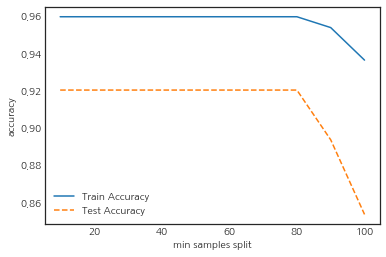

In [68]:
plt.plot(para_split, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_split, test_accuracy, linestyle='--', label='Test Accuracy')
plt.xlabel('min samples split'); plt.ylabel('accuracy')
plt.legend()

분리 노드의 최소 자료 수 증가에 따라 모델의 정확도는 감소하며, train/test 데이터의 성능 변화를 고려하여 20 선택

In [69]:
train_accuracy =[]; test_accuracy =[]

para_leaf = [n_leaf * 10 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    rf=RandomForestClassifier(min_samples_leaf = v_min_samples_leaf,min_samples_split=20,
                             max_depth =3, n_estimators =20, random_state=1234)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))

df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf['MinSamplesLeaf'] = para_leaf
df_accuracy_leaf['TrainAccuracy'] = train_accuracy
df_accuracy_leaf['TestAccuracy'] = test_accuracy

In [70]:
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,10,0.948,0.893
1,20,0.948,0.867
2,30,0.936,0.880
3,40,0.767,0.680
4,50,0.767,0.680
5,60,0.767,0.680
6,70,0.767,0.680
7,80,0.767,0.680
8,90,0.767,0.680
9,100,0.767,0.680


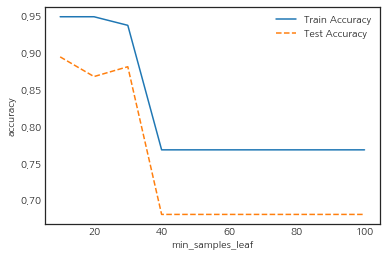

In [71]:
plt.plot(para_leaf, train_accuracy, linestyle='-', label="Train Accuracy" )
plt.plot(para_leaf, test_accuracy, linestyle='--', label="Test Accuracy" )
plt.xlabel('min_samples_leaf'); plt.ylabel('accuracy')
plt.legend()

잎사귀 노드 최소 자료 수 증가에 따라 모델의 정확도는 감소하며 train/test 데이터의 성능 변화를 고려하여 10을 선택

In [72]:
rf_final = RandomForestClassifier(min_samples_leaf = 10, min_samples_split = 20, max_depth=3,
                                 n_estimators=20, random_state=1234)
rf_final.fit(df_train_x, df_train_y)
y_pred = rf_final.predict(df_test_x)

print('Accuracy on training set:{:.3f}'.format(rf_final.score(df_train_x,df_train_y)))
print('Accuracy on test set:{:.3f}'.format(rf_final.score(df_test_x,df_test_y)))
print('Confusion Matrix:\n{}'.format(confusion_matrix(df_test_y,y_pred)))

Accuracy on training set:0.948
Accuracy on test set:0.893
Confusion Matrix:
[[49  2]
 [ 6 18]]


In [73]:
v_feature_name = df_train_x.columns

df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = rf_final.feature_importances_

df_importance.sort_values('Importance', ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
5,허리둘레,0.457
0,주요질병합병코드,0.315
4,체중(5Kg단위),0.182
2,연령대코드(5세단위),0.034
3,신장(5Cm단위),0.008
1,성별코드,0.003


Text(0, 0.5, '변수')

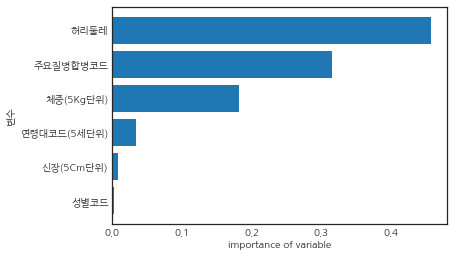

In [74]:
df_importance.sort_values('Importance', ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('importance of variable')
plt.ylabel('변수')

In [77]:
#GridSearchCV : 최적 parameter 찾기

estimator = RandomForestClassifier(n_estimators=100, random_state=1234)
param_grid = {'max_depth': para_depth, 'min_samples_leaf': para_leaf}

grid_rf = GridSearchCV(estimator, param_grid, scoring='accuracy', n_jobs=-1)
grid_rf.fit(df_train_x, df_train_y)
print("best estimator model :\n{}" .format(grid_rf.best_estimator_))
print("\nbest parameter: \n{}" .format(grid_rf.best_params_))
print("\nbest score:\n{}" .format(grid_rf.best_score_.round(3)))

best estimator model :
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=1234, verbose=0,
            warm_start=False)

best parameter: 
{'max_depth': 2, 'min_samples_leaf': 10}

best score:
0.948


In [96]:
rf_final = RandomForestClassifier(min_samples_leaf = 10, min_samples_split = 2, max_depth=2,
                                 n_estimators=100, random_state=503)
rf_final.fit(df_train_x, df_train_y)
y_pred = rf_final.predict(df_test_x)

print('Accuracy on training set:{:.3f}'.format(rf_final.score(df_train_x,df_train_y)))
print('Accuracy on test set:{:.3f}'.format(rf_final.score(df_test_x,df_test_y)))
print('Confusion Matrix:\n{}'.format(confusion_matrix(df_test_y,y_pred)))

Accuracy on training set:0.953
Accuracy on test set:0.920
Confusion Matrix:
[[48  3]
 [ 3 21]]


In [97]:
v_feature_name = df_train_x.columns

df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = rf_final.feature_importances_

df_importance.sort_values('Importance', ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
0,주요질병합병코드,0.457
5,허리둘레,0.360
4,체중(5Kg단위),0.115
1,성별코드,0.030
2,연령대코드(5세단위),0.026
3,신장(5Cm단위),0.013


Text(0, 0.5, '변수')

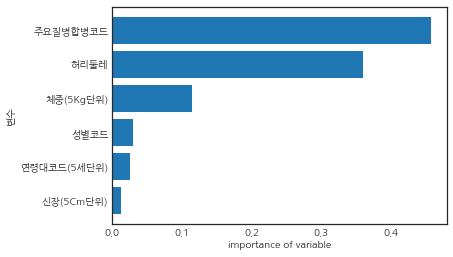

In [98]:
df_importance.sort_values('Importance', ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('importance of variable')
plt.ylabel('변수')

### (3) gradient boosting

In [99]:
from sklearn.ensemble import GradientBoostingClassifier

In [103]:
#learning_rate : 학습률 변경에 따른 모델 성능
train_accuracy =[]; test_accuracy=[]
para_lr =[lr * 0.1 for lr in range(1,10)]

for v_learning_rate in para_lr:
    gb=GradientBoostingClassifier(learning_rate = v_learning_rate)
    gb.fit(df_train_x,df_train_y)
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    test_accuracy.append(gb.score(df_test_x,df_test_y))
    
df_accuracy_lr = pd.DataFrame()
df_accuracy_lr['LearningRate'] = para_lr
df_accuracy_lr['TrainAccuracy'] = train_accuracy
df_accuracy_lr['TestAccuracy'] = test_accuracy

In [104]:
df_accuracy_lr.round(3)

,LearningRate,TrainAccuracy,TestAccuracy
0,0.1,1.0,0.840
1,0.2,1.0,0.827
2,0.3,1.0,0.827
3,0.4,1.0,0.787
4,0.5,1.0,0.853
5,0.6,1.0,0.813
6,0.7,1.0,0.813
7,0.8,1.0,0.853
8,0.9,1.0,0.800


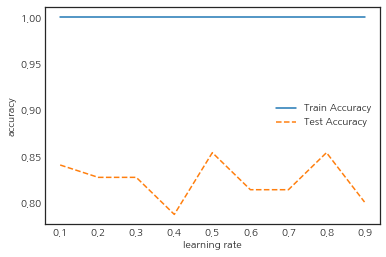

In [105]:
plt.plot(para_lr, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_lr, test_accuracy, linestyle='--', label='Test Accuracy')
plt.xlabel('learning rate'); plt.ylabel('accuracy')
plt.legend()

학습률 증가에 따라 모델의 정확도는 증가하는데 test 데이터의 성능은 특별히 개선되지 않아 0.1 선택

In [106]:
#n_estimators : 트리 수 변경에 따른 모델 성능
train_accuracy = []; test_accuracy = []

para_n_tree = [n_tree * 10 for n_tree in range(1,16)]

for v_n_estimators in para_n_tree:
    gb=GradientBoostingClassifier(n_estimators=v_n_estimators, learning_rate=0.1, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

df_accuracy_n = pd.DataFrame()
df_accuracy_n['Estimators'] = para_n_tree
df_accuracy_n['TrainAccuracy'] = train_accuracy
df_accuracy_n['TestAccuracy'] = test_accuracy

In [107]:
df_accuracy_n.round(3)

,Estimators,TrainAccuracy,TestAccuracy
0,10,0.965,0.907
1,20,0.971,0.853
2,30,0.971,0.853
3,40,0.988,0.853
4,50,0.994,0.840
5,60,0.994,0.840
6,70,1.000,0.827
7,80,1.000,0.827
8,90,1.000,0.827
9,100,1.000,0.827


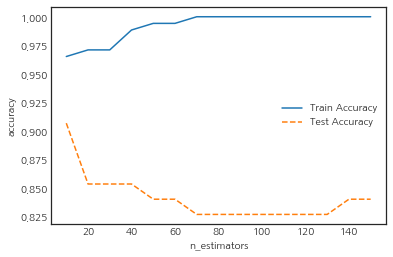

In [108]:
plt.plot(para_n_tree, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_n_tree, test_accuracy, linestyle='--', label='Test Accuracy')
plt.xlabel('n_estimators'); plt.ylabel('accuracy')
plt.legend()

생성하는 결정 트리 수 증가에 따라 모델의 정확도는 증가하며 train/test 데이터의 성능변화를 고려하여 40을 선택한다.

In [109]:
#max_depth : 최대 깊이 변경에 따른 모델 성능
train_accuracy = []; test_accuracy = []

para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    gb=GradientBoostingClassifier(max_depth = v_max_depth, n_estimators = 40,
                                  learning_rate=0.1, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['Depth'] = para_depth
df_accuracy_depth['TrainAccuracy'] = train_accuracy
df_accuracy_depth['TestAccuracy'] = test_accuracy

In [110]:
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.959,0.920
1,2,0.965,0.907
2,3,0.988,0.853
3,4,0.994,0.840
4,5,1.000,0.800
5,6,1.000,0.827
6,7,1.000,0.800
7,8,1.000,0.813
8,9,1.000,0.813
9,10,1.000,0.813


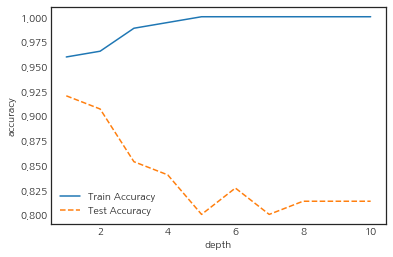

In [111]:
plt.plot(para_depth, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_depth, test_accuracy, linestyle='--', label='Test Accuracy')
plt.xlabel('depth'); plt.ylabel('accuracy')
plt.legend()

최대 깊이 증가에 따라 모델의 정확도는 증가하며 train/test 데이터의 성능 변화를 고려하여 2를 선택한다.

In [113]:
#min_samples_split : 분리 노드의 최소 자료 수 변경에 따른 모델 성능
train_accuracy =[]; test_accuracy = []

para_split = [n_split * 10 for n_split in range(2,11)]

for v_min_samples_split in para_split :
    gb=GradientBoostingClassifier(min_samples_split = v_min_samples_split, max_depth=2,
                             n_estimators=40,learning_rate=0.1, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    test_accuracy.append(gb.score(df_test_x,df_test_y))
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split['MinSamplesSplit'] = para_split
df_accuracy_split['TrainAccuracy'] = train_accuracy
df_accuracy_split['TestAccuracy'] = test_accuracy

In [114]:
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,20,0.965,0.88
1,30,0.965,0.88
2,40,0.965,0.88
3,50,0.965,0.88
4,60,0.965,0.88
5,70,0.965,0.88
6,80,0.965,0.88
7,90,0.965,0.88
8,100,0.965,0.88


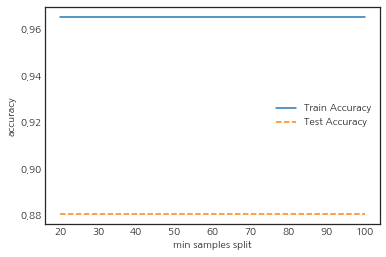

In [115]:
plt.plot(para_split, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_split, test_accuracy, linestyle='--', label='Test Accuracy')
plt.xlabel('min samples split'); plt.ylabel('accuracy')
plt.legend()

In [116]:
#min_samples_leaf : 잎사귀 노드의 최소 자료 수 변경에 따른 모델 성능
train_accuracy =[]; test_accuracy =[]

para_leaf = [n_leaf * 10 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    gb=GradientBoostingClassifier(min_samples_leaf = v_min_samples_leaf,
                             max_depth =2, n_estimators =40, learning_rate=0.1, random_state=1234)
    gb.fit(df_train_x,df_train_y)
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    test_accuracy.append(gb.score(df_test_x,df_test_y))

df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf['MinSamplesLeaf'] = para_leaf
df_accuracy_leaf['TrainAccuracy'] = train_accuracy
df_accuracy_leaf['TestAccuracy'] = test_accuracy

In [117]:
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,10,0.953,0.920
1,20,0.953,0.920
2,30,0.953,0.920
3,40,0.953,0.920
4,50,0.936,0.893
5,60,0.855,0.840
6,70,0.866,0.867
7,80,0.814,0.800
8,90,0.767,0.680
9,100,0.767,0.680


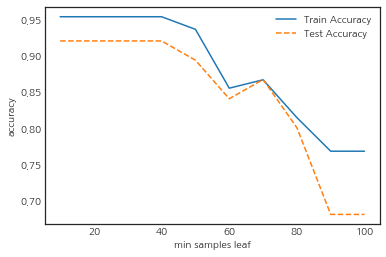

In [118]:
plt.plot(para_leaf, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_leaf, test_accuracy, linestyle='--', label='Test Accuracy')
plt.xlabel('min samples leaf'); plt.ylabel('accuracy')
plt.legend()

잎사귀 노드 최소 자료 수 증가에 따라 모데르이 정확도는 감소하며 train/test데이터의 성능 변화를 고려하여 10을 선택한다.

In [119]:
gb_final = GradientBoostingClassifier(min_samples_leaf = 10, max_depth=2,
                                 n_estimators=40, learning_rate=0.1, random_state=1234)
gb_final.fit(df_train_x, df_train_y)
y_pred = gb_final.predict(df_test_x)

print('Accuracy on training set:{:.3f}'.format(gb_final.score(df_train_x,df_train_y)))
print('Accuracy on test set:{:.3f}'.format(gb_final.score(df_test_x,df_test_y)))
print('Confusion Matrix:\n{}'.format(confusion_matrix(df_test_y,y_pred)))

Accuracy on training set:0.953
Accuracy on test set:0.920
Confusion Matrix:
[[48  3]
 [ 3 21]]


In [120]:
v_feature_name = df_train_x.columns

df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = gb_final.feature_importances_

df_importance.sort_values('Importance', ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
0,주요질병합병코드,0.766
5,허리둘레,0.195
2,연령대코드(5세단위),0.024
4,체중(5Kg단위),0.014
3,신장(5Cm단위),0.000
1,성별코드,0.000


Text(0, 0.5, '설명변수')

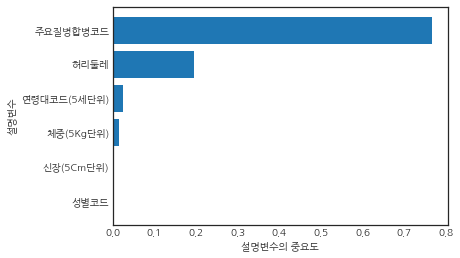

In [121]:
df_importance.sort_values('Importance', ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('설명변수의 중요도')
plt.ylabel('설명변수')

In [123]:
#GridSearchCV : 최적 parameter

estimator = GradientBoostingClassifier(n_estimators=100, random_state=1234)
param_grid = {'learning_rate': para_lr, 'max_depth': para_depth, 'min_samples_leaf': para_leaf}

grid_gb = GridSearchCV(estimator, param_grid, scoring='accuracy', n_jobs=-1)
grid_gb.fit(df_train_x, df_train_y)
print("best estimator model: \n{}" .format(grid_gb.best_estimator_))
print("\nbest parameter: \n{}" .format(grid_gb.best_params_))
print("\nbest score: \n{}" .format(grid_gb.best_score_.round(3)))

best estimator model: 
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=30, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=1234,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

best parameter: 
{'learning_rate': 0.2, 'max_depth': 1, 'min_samples_leaf': 30}

best score: 
0.936


In [143]:
gb_final = GradientBoostingClassifier(min_samples_leaf = 30, max_depth=2,
                                 n_estimators=100, learning_rate=0.2, random_state=1234)
gb_final.fit(df_train_x, df_train_y)
y_pred = gb_final.predict(df_test_x)

print('Accuracy on training set:{:.3f}'.format(gb_final.score(df_train_x,df_train_y)))
print('Accuracy on test set:{:.3f}'.format(gb_final.score(df_test_x,df_test_y)))
print('Confusion Matrix:\n{}'.format(confusion_matrix(df_test_y,y_pred)))

Accuracy on training set:0.959
Accuracy on test set:0.907
Confusion Matrix:
[[49  2]
 [ 5 19]]


In [144]:
v_feature_name = df_train_x.columns

df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = gb_final.feature_importances_

df_importance.sort_values('Importance', ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
0,주요질병합병코드,0.704
5,허리둘레,0.247
4,체중(5Kg단위),0.035
3,신장(5Cm단위),0.009
2,연령대코드(5세단위),0.005
1,성별코드,0.000


Text(0, 0.5, '설명변수')

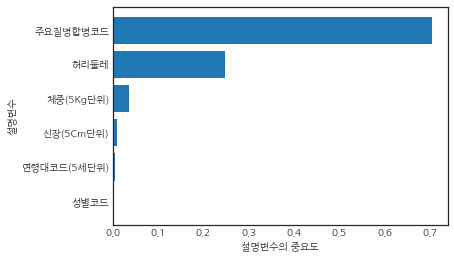

In [145]:
df_importance.sort_values('Importance', ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('설명변수의 중요도')
plt.ylabel('설명변수')

### 모델 평가

In [146]:
from sklearn.metrics import f1_score, roc_curve, auc

In [147]:
#분석모델
model = ['Decision Tree', 'RandomForest', 'GradientBoosting']
#정확도 저장
train_accuracy = []; test_accuracy = []
#f1 저장
model_f1_score = []
#auc score 저장
model_auc = []

In [148]:
## 의사결정 나무

dt_model = DecisionTreeClassifier(max_depth=3, min_samples_leaf=8)
dt_model.fit(df_train_x, df_train_y)

#train 정확도
train_accuracy.append(dt_model.score(df_train_x, df_train_y))
#test 정확도
test_accuracy.append(dt_model.score(df_test_x, df_test_y))
#예측값
y_pred = dt_model.predict(df_test_x)
#roc curve
fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)
#auc저장
model_auc.append(roc_auc)

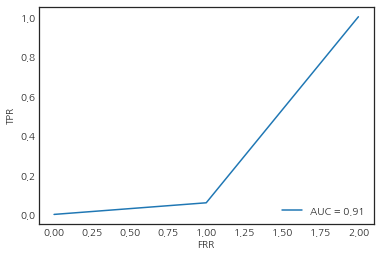

In [149]:
plt.plot(fpr, label='AUC = %0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.ylabel('TPR'); plt.xlabel('FRR')
plt.show()

In [150]:
model_f1_score.append(f1_score(df_test_y,y_pred))

In [151]:
## 랜덤포레스트

rf_model = RandomForestClassifier(min_samples_leaf=10, max_depth=2, n_estimators=100, random_state=1234)
rf_model.fit(df_train_x,df_train_y)

train_accuracy.append(rf_model.score(df_train_x,df_train_y))
test_accuracy.append(rf_model.score(df_test_x, df_test_y))
y_pred = rf_model.predict(df_test_x)
#roc curve
fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)
#auc저장
model_auc.append(roc_auc)

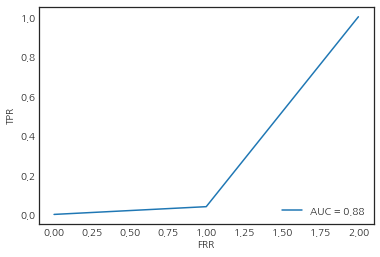

In [152]:
plt.plot(fpr, label='AUC = %0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.ylabel('TPR'); plt.xlabel('FRR')
plt.show()

In [153]:
model_f1_score.append(f1_score(df_test_y, y_pred))

In [154]:
## 그래디언트 부스팅

gb_model = GradientBoostingClassifier(min_samples_leaf=30, max_depth=1, n_estimators=100,
                                      learning_rate = 0.2, random_state=1234)
gb_model.fit(df_train_x,df_train_y)

train_accuracy.append(gb_model.score(df_train_x,df_train_y))
test_accuracy.append(gb_model.score(df_test_x, df_test_y))
y_pred = gb_model.predict(df_test_x)
#roc curve
fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)
#auc저장
model_auc.append(roc_auc)

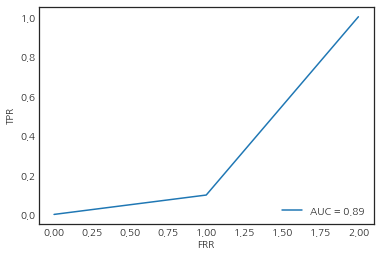

In [155]:
plt.plot(fpr, label='AUC = %0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.ylabel('TPR'); plt.xlabel('FRR')
plt.show()

In [156]:
model_f1_score.append(f1_score(df_test_y, y_pred))

In [157]:
df_eval = pd.DataFrame(index=model)
df_eval['TrainAccuracy'] = train_accuracy
df_eval['TestAccuracy'] = test_accuracy
df_eval['F1Score'] = model_f1_score
df_eval['AUC'] = model_auc
df_eval.round(3)

,TrainAccuracy,TestAccuracy,F1Score,AUC
Decision Tree,0.953,0.920,0.875,0.908
RandomForest,0.948,0.907,0.844,0.876
GradientBoosting,0.948,0.893,0.840,0.888


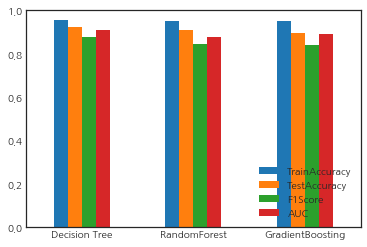

In [158]:
#정확도 bar plot 형성
df_eval.plot.bar(rot=0)
plt.legend(loc='lower right')
plt.grid(axis='Y')

Decision Tree 가 가장 높은 정확도와 F1-score , AUC를 보인다.

Decision Tree > RandomForest > Gradient Boosting